# **IBM INTERNSHIP PROJECT FOR DATA ANALYTICS**
## **DESCRIPTIVE DATA ANALYSIS**
## **Superstore Data Analysis**

**OBJECTIVES:**
1. The primary objective of data analysis is often to gain valuable insights and understanding from the data.
2. In data analysis used to clean and visualize the dataset. 
3. To analyze the Sales and Profit based on different regions, categories and other parameters.
4. Data analysis may involve building predictive models to forecast future outcomes.
5. To find the States having maximum profit and maximum sales.

In [281]:
# Importing the necessary python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [282]:
# Importing the csv file
df=pd.read_csv("Analysis of Super Store - DA.csv")

**UNDERSTANDING DATA:**

In [283]:
# Viewing the file headers to derive a primary meaning of the data
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [284]:
df.shape

(9994, 13)

In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


### **Statistical Analysis:**

In [286]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


 **DATA CLEANING:**

We need to analyze the Sales of the Superstore in the dataset, the column named Postal Code is redundant. Hence, we drop that column.

In [287]:
df.drop(columns="Postal Code",inplace=True)
df.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [288]:
# Checking unique values for the column "Country"
df['Country'].unique()

array(['United States'], dtype=object)

The entire dataset holds the Superstore data of United States alone, thus including the 'Country' column is redundant while analyzing the dataset.

In [289]:
# Drop redundant columns
df.drop(columns="Country",inplace=True)
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


**REMOVING NULL VALUES**

In [290]:
# Check for null values
df.isna().sum()

Ship Mode       0
Segment         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

There are no null values present in superstore dataset, we can proceed to perform Exploratory Data Analysis on the final dataset.

**REMOVING DUPLICATE VALUES**

In [291]:
df.duplicated().sum()

50

In [292]:
# Removing duplicate values
df.drop_duplicates()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


**Exploratory Data Analysis**

In [293]:
# Finding the unique values for each column in the dataset
print(df['Ship Mode'].unique())
print(df['Segment'].unique())
print(df['City'].nunique()) #counting number of unique values
print(df['State'].nunique())
print(df['Region'].unique())
print(df['Category'].unique())
print(df['Sub-Category'].unique())

['Second Class' 'Standard Class' 'First Class' 'Same Day']
['Consumer' 'Corporate' 'Home Office']
531
49
['South' 'West' 'Central' 'East']
['Furniture' 'Office Supplies' 'Technology']
['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 859.0+ KB


### **Sales Analysis**  

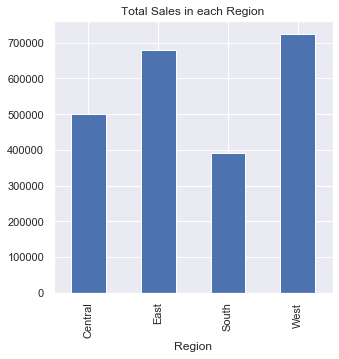

In [295]:
# Sales Analysis based on region
plt.title("Total Sales in each Region")
df.groupby('Region')['Sales'].sum().plot.bar(figsize=(5,5))

Text(0.5, 1.0, 'Market Share of each Region')

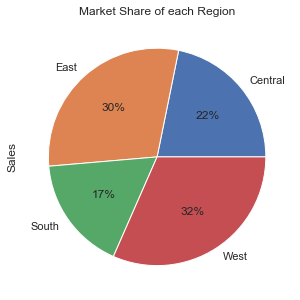

In [296]:
df.groupby('Region')['Sales'].sum().plot.pie(autopct="%1.0f%%")
plt.title("Market Share of each Region")

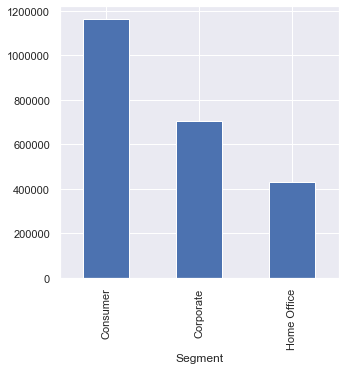

In [298]:
# Sales Analysis based on segment
sales_seg = df.groupby('Segment')['Sales'].sum().plot.bar(figsize=(5,5))

Text(0.5, 1.0, 'Market share of each Segment')

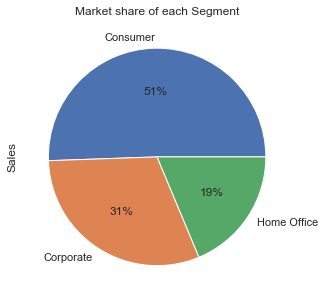

In [299]:
df.groupby('Segment')['Sales'].sum().plot.pie(autopct="%1.0f%%")
plt.title("Market share of each Segment")

Text(0.5, 1.0, 'Top-5 selling Cities')

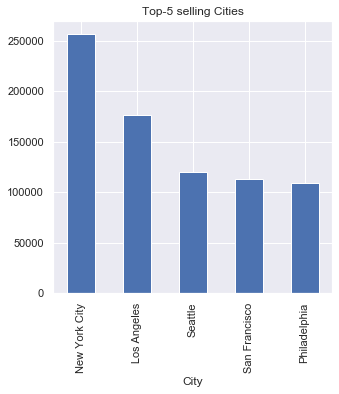

In [300]:
# Sales Analysis based on city- top 5
df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(5).plot.bar(figsize=(5,5))
plt.title("Top-5 selling Cities")

Text(0.5, 1.0, 'Top-5 selling States')

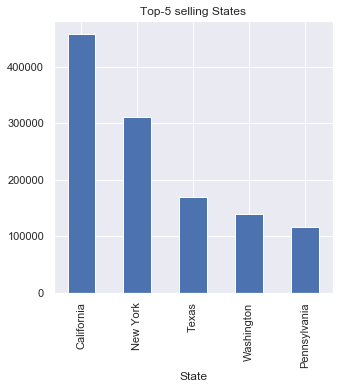

In [301]:
# Sales Analysis based on State- top 5
df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(5).plot.bar(figsize=(5,5))
plt.title("Top-5 selling States")


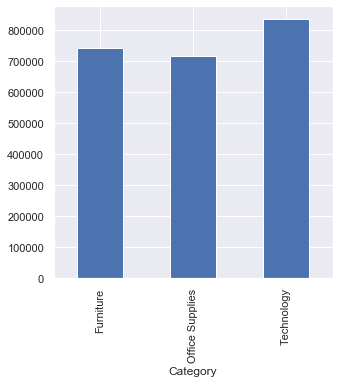

In [302]:
# Sales Analysis based on category
df.groupby('Category')['Sales'].sum().plot.bar(figsize=(5,5))

Text(0.5, 1.0, 'Market Share of each Sub-Category of product')

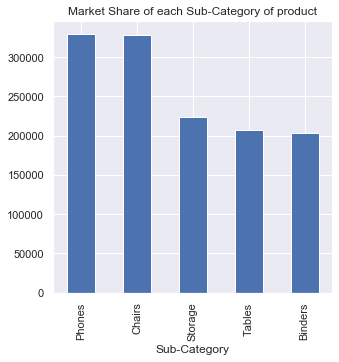

In [304]:
# Sales Analysis based on sub-category
df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(5).plot.bar(figsize=(5,5))
plt.title("Market Share of each Sub-Category of product")


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


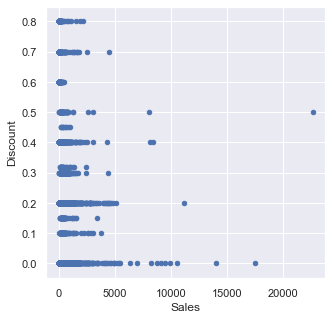

In [305]:
# Sales Analysis based on Discount
df.plot.scatter("Sales","Discount")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


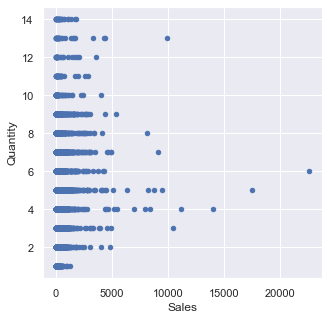

In [306]:
# Sales Analysis based on Quantity
df.plot.scatter("Sales","Quantity")

In [307]:
corr = df.corr()
corr['Sales'].sort_values(ascending=False)

Sales       1.000000
Profit      0.479064
Quantity    0.200795
Discount   -0.028190
Name: Sales, dtype: float64

**Sales Insights**


*   The West region gives to the maximum amount of sales, followed by the East. South has the minimum sales.
*   The majority of the Sales opts for the shipping mode Standard Class
*   Highest Sales occurs in the New York City, followed by Los Angeles
*   Highest profit can be seen in copiers and sales are extremely high for the phones and chairs with respect to other products.
*   The maximum sales occurs in the Consumer Segment , followed by Corporate    
*   The State having the highest sales is California, followed by New York
*   The maximum sales occurs in the Technology category in the Sub-Category of Phones, followed by Chairs of the category Furniture.
*   Peoples doesn't prefer much to buy tablets and books so they are in loss.
Furniture and Office supplies  have nearly equal share of sales.
*   Sales does not depend upon Discount and Quantity significantly, since the coefficient of correlation between them is negligible. However, Sales is directly dependent on Profit, which is quite obvious. Higher the Sales, more is the Profit generated.

## **Conclusion:**


1.   The West Region has the maximum amount of Sales followed by the East
2.   The city of Los Angeles in the State of California in the West Region of the United States and New York City in New York in the East contributes to the maximum amount of Sales.
3.  The maximum Sales is encountered in the Sub-Category of Phones in the Category Technology, followed by Chairs in the Category Furniture. However, Furniture and Office supplies have nearly equal share of Sales.


### **Profit Analysis**


Text(0.5, 1.0, 'Total Profit in each Region')

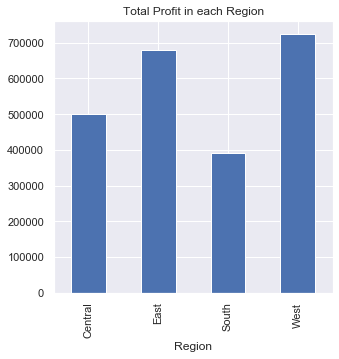

In [308]:
# Profit Analysis based on region
df.groupby('Region')['Sales'].sum().plot.bar(figsize=(5,5))
plt.title("Total Profit in each Region")


Text(0.5, 1.0, 'Profitability of each Region')

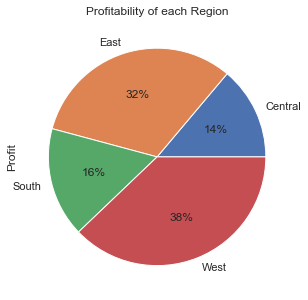

In [309]:
df.groupby('Region')['Profit'].sum().plot.pie(autopct="%1.0f%%")
plt.title("Profitability of each Region")

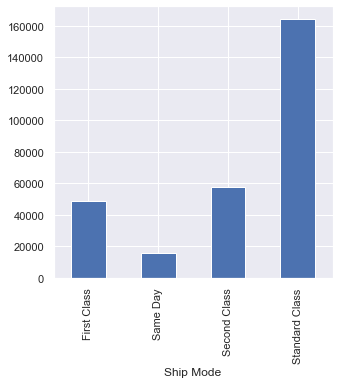

In [310]:
# Profit Analysis based on ship mode
profit_ship = df.groupby('Ship Mode')['Profit'].sum().plot.bar(figsize=(5,5))

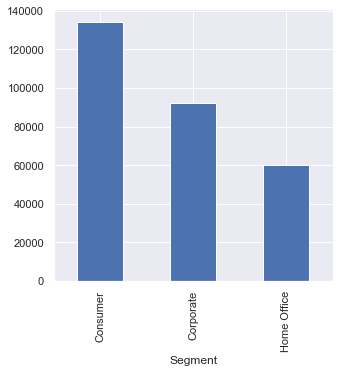

In [311]:
# Profit Analysis based on segment
profit_seg = df.groupby('Segment')['Profit'].sum().plot.bar(figsize=(5,5))

Text(0.5, 1.0, 'Profitability of each Segment')

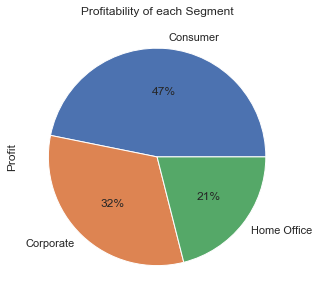

In [312]:
df.groupby('Segment')['Profit'].sum().plot.pie(autopct="%1.0f%%")
plt.title("Profitability of each Segment")

Text(0.5, 1.0, 'Top-5 Profitable Cities')

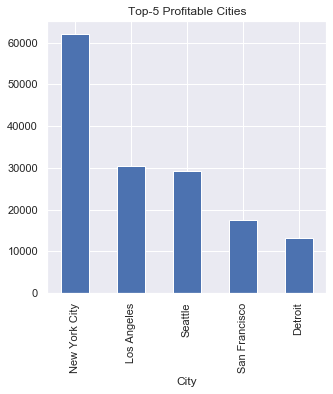

In [313]:
# Profit Analysis based on city- top 5
df.groupby('City')['Profit'].sum().sort_values(ascending=False).head(5).plot.bar(figsize=(5,5))
plt.title("Top-5 Profitable Cities")


Text(0.5, 1.0, 'Top-5 Profitable States')

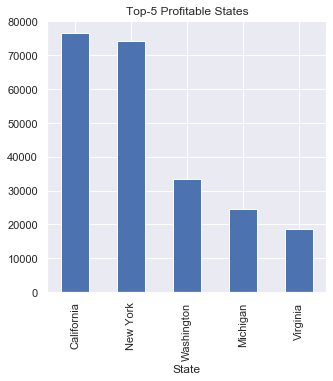

In [314]:
# Profit Analysis based on State- top 5
df.groupby('State')['Profit'].sum().sort_values(ascending=False).head(5).plot.bar(figsize=(5,5))
plt.title("Top-5 Profitable States")

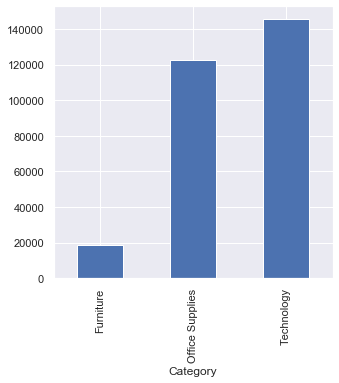

In [315]:
# Profit Analysis based on category
df.groupby('Category')['Profit'].sum().plot.bar(figsize=(5,5))

Text(0.5, 1.0, 'Profitability of each Category of product')

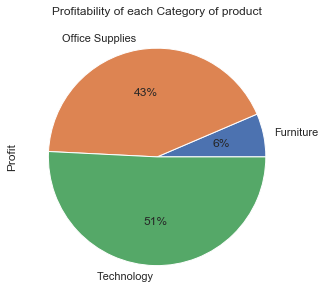

In [316]:
df.groupby('Category')['Profit'].sum().plot.pie(autopct="%1.0f%%")
plt.title("Profitability of each Category of product")

Text(0.5, 1.0, 'Profitability of top-6 Sub-Category of product')

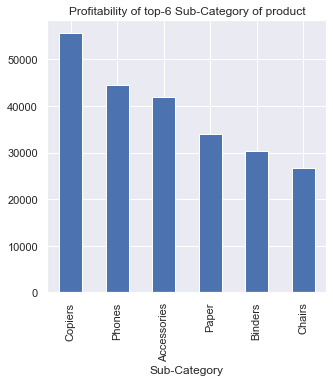

In [317]:
# Profit Analysis based on sub-category
df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).head(6).plot.bar(figsize=(5,5))
plt.title("Profitability of top-6 Sub-Category of product")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


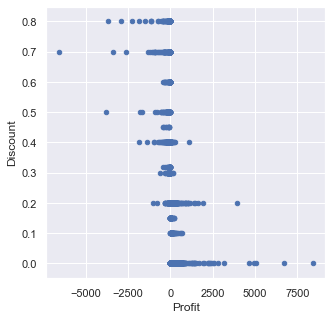

In [318]:
# Profit Analysis based on Discount
df.plot.scatter("Profit","Discount")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


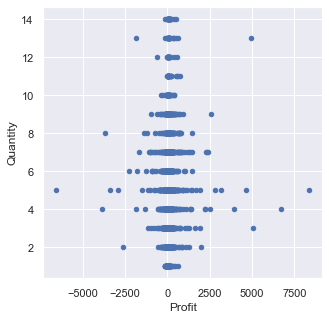

In [319]:
# Profit Analysis based on Quantity
df.plot.scatter("Profit","Quantity")

In [320]:
corr = df.corr()
corr['Profit'].sort_values(ascending=False)

Profit      1.000000
Sales       0.479064
Quantity    0.066253
Discount   -0.219487
Name: Profit, dtype: float64

**Profit Insights**


* Profit in east & west regions is better than south and central.  
* Highest profit is earned in Copiers while Selling price for Chairs and Phones is extremely high compared to other  products. 
* Another interesting fact- people don’t prefer to buy Tables and bookcases from Superstore. Hence these departments are in loss.
* Highest Profit is earned in the New York City, followed by Los Angeles and Seattle, which have nearly equal total profit earned.
*   The State having the highest profit is California and New York, having nearly equal share of Profit
*   The maximum Profit is incurred from the Technology category in the Sub-Category of Copiers and Phones, followed by the category Office Supplies .Furniture yields the least profit 
*   Profit does not depend upon Discount and Quantity, since the coefficient of correlation between them is negligible. However, Profit is directly dependent on Sales, which is quite obvious. Higher the Sales, more is the Profit generated.


## **Conclusion:**


1.   The West Region gives to the maximum amount of Profit followed by the East.
2.   Profit in east & west regions is better than south and central.
3.   The city of Los Angeles in the State of California, followed by Seattle in Washington in the West Region of the United States and New York City in New York in the East gives to the maximum amount of Profit.
4.  The maximum Profit is earned in the Sub-Category of Copiers, followed by Phones in the Category Technology, followed by the Category of Office Supplies. Furniture yields the least amount of Profit, although its sales is high.


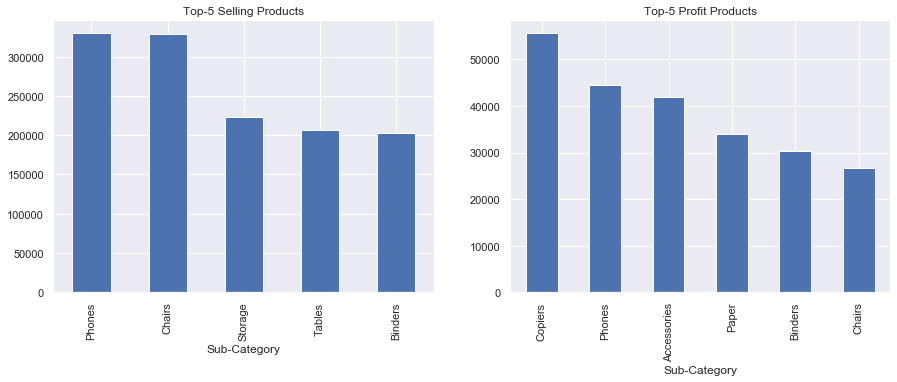

In [321]:
#Comparing the top selling products vs the top profitable products
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,5))

# Top 5 selling products in the first plot
sales_pdt=df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(5).plot(kind="bar",figsize=(15,5),y="Sales",ax=ax1)
ax1.set_title("Top-5 Selling Products")

# Top 5 profit products in the second plot
profit_pdt=df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).head(6).plot(kind="bar",figsize=(15,5),y="Profit",ax=ax2)
ax2.set_title("Top-5 Profit Products")

plt.show()

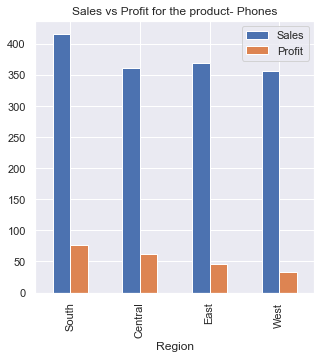

In [322]:
# Filter the data to only include the highest selling products
product = df[df["Sub-Category"] == "Phones"]

# Group the data by Region
region_group = product.groupby(["Region"]).mean()[["Sales", "Profit"]].sort_values(by="Profit",ascending=False)
region_group.plot(kind="bar")
plt.title("Sales vs Profit for the product- Phones")
plt.show()

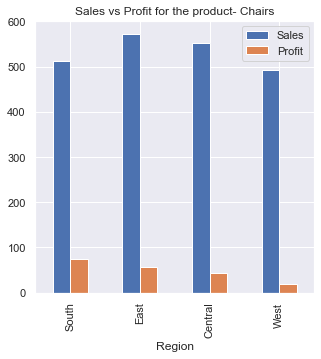

In [323]:
# Filter the data to only include the highest selling products
product = df[df["Sub-Category"] == "Chairs"]

# Group the data by Region
region_group = product.groupby(["Region"]).mean()[["Sales", "Profit"]].sort_values(by="Profit",ascending=False)
region_group.plot(kind="bar")
plt.title("Sales vs Profit for the product- Chairs")
plt.show()

Text(0.5, 1.0, 'Sales vs Profit for the product- Copiers')

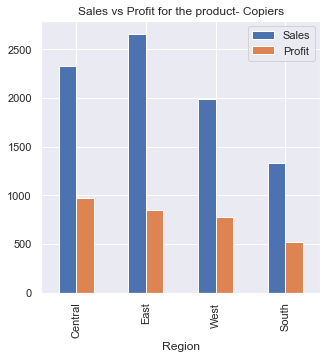

In [324]:
# Filter the data to only include the highest selling products
product = df[df["Sub-Category"] == "Copiers"]

# Group the data by Region
region_group = product.groupby(["Region"]).mean()[["Sales", "Profit"]].sort_values(by="Profit",ascending=False)
region_group.plot(kind="bar")
plt.title("Sales vs Profit for the product- Copiers")

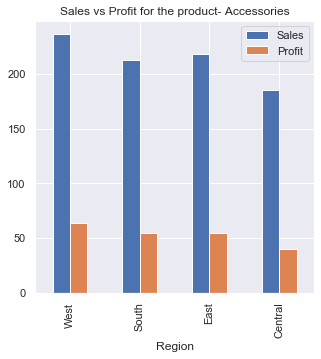

In [325]:
# Filter the data to only include the highest selling products
product = df[df["Sub-Category"] == "Accessories"]

# Group the data by Region
region_group = product.groupby(["Region"]).mean()[["Sales", "Profit"]].sort_values(by="Profit",ascending=False)
region_group.plot(kind="bar")
plt.title("Sales vs Profit for the product- Accessories")
plt.show()

**PROFIT MARGIN**

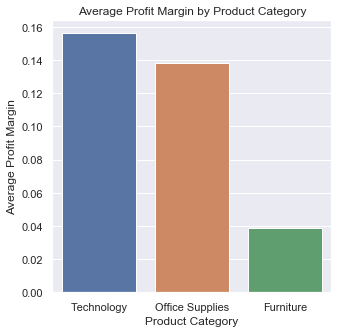

In [326]:
df['Profit Margin'] = df['Profit'] / df['Sales']

# Group the data by product category and calculate the average profit margin for each category
avg_profit_margin_by_category = df.groupby(['Category'],as_index=False)['Profit Margin'].mean().sort_values(by='Profit Margin',ascending=False)

# Plot the average profit margin for each category as a bar chart
# avg_profit_margin_by_category.plot(kind='bar')
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(data = avg_profit_margin_by_category, x = 'Category',y= 'Profit Margin')
# Add a title and labels to the chart
plt.title("Average Profit Margin by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Average Profit Margin")

plt.show()

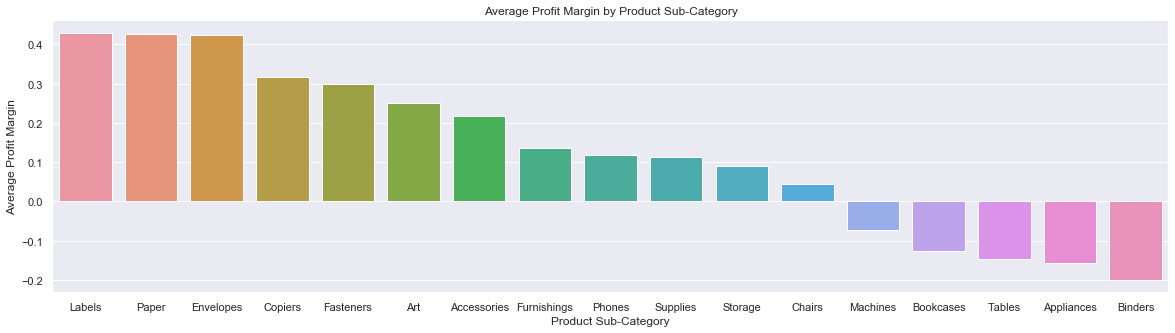

In [327]:
df['Profit Margin'] = df['Profit'] / df['Sales']
# Group the data by product sub-category and calculate the average profit margin for each sub-category
avg_profit_margin_by_category = df.groupby(['Sub-Category'],as_index=False)['Profit Margin'].mean().sort_values(by='Profit Margin',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = avg_profit_margin_by_category, x = 'Sub-Category',y= 'Profit Margin')
plt.title("Average Profit Margin by Product Sub-Category")
plt.xlabel("Product Sub-Category")
plt.ylabel("Average Profit Margin")

plt.show()

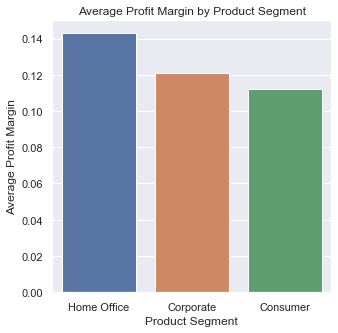

In [328]:
df['Profit Margin'] = df['Profit'] / df['Sales']

# Group the data by product segment and calculate the average profit margin for each segment
avg_profit_margin_by_category = df.groupby(['Segment'],as_index=False)['Profit Margin'].mean().sort_values(by='Profit Margin',ascending=False)
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(data = avg_profit_margin_by_category, x = 'Segment',y= 'Profit Margin')
plt.title("Average Profit Margin by Product Segment")
plt.xlabel("Product Segment")
plt.ylabel("Average Profit Margin")

plt.show()

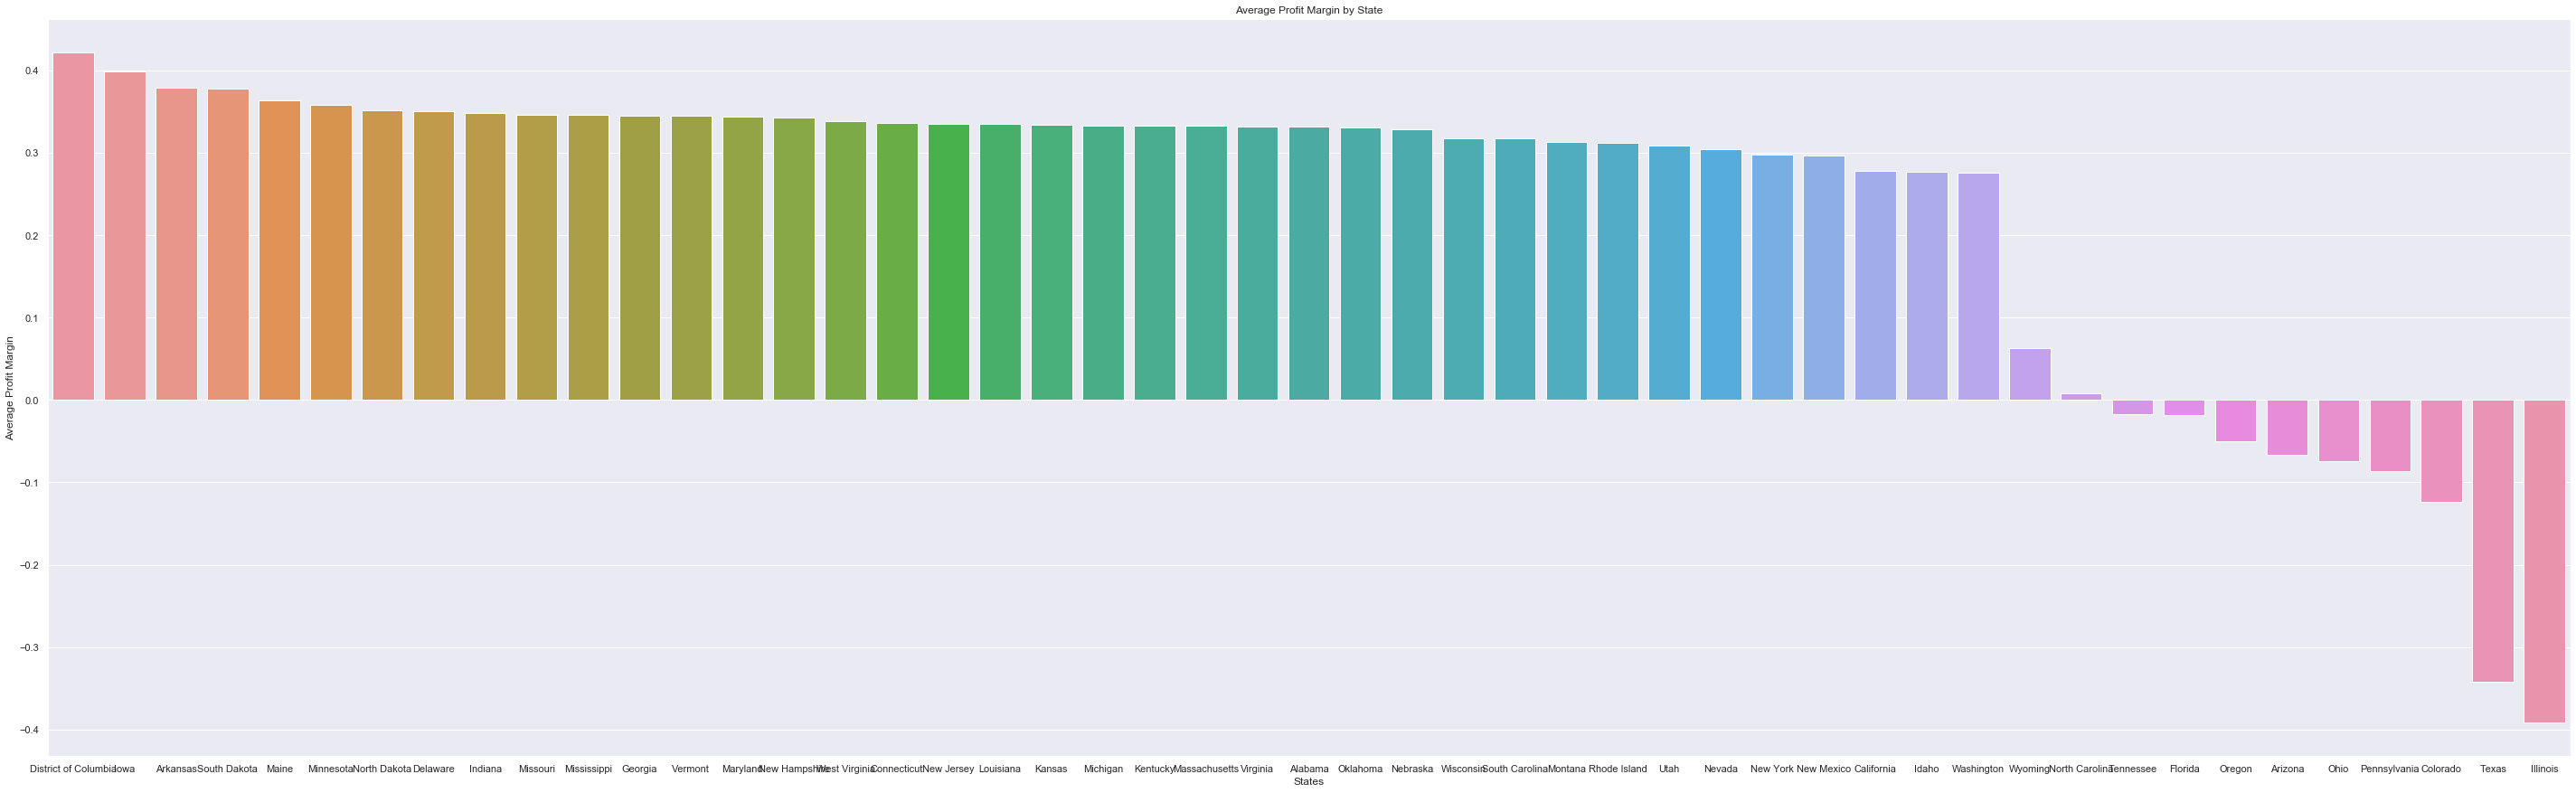

In [329]:
df['Profit Margin'] = df['Profit'] / df['Sales']

# Group the data by state and calculate the average profit margin for each state
avg_profit_margin_by_category = df.groupby(['State'],as_index=False)['Profit Margin'].mean().sort_values(by='Profit Margin',ascending=False).head(50)
sns.set(rc={'figure.figsize':(50,15)})
sns.barplot(data = avg_profit_margin_by_category, x = 'State',y= 'Profit Margin')
plt.title("Average Profit Margin by State")
plt.xlabel("States")
plt.ylabel("Average Profit Margin")

plt.show()

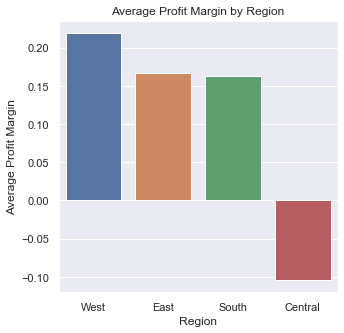

In [330]:
df['Profit Margin'] = df['Profit'] / df['Sales']
# Group the data by region and calculate the average profit margin for each region
avg_profit_margin_by_category = df.groupby(['Region'],as_index=False)['Profit Margin'].mean().sort_values(by='Profit Margin',ascending=False).head(50)
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(data = avg_profit_margin_by_category, x = 'Region',y= 'Profit Margin')
plt.title("Average Profit Margin by Region")
plt.xlabel("Region")
plt.ylabel("Average Profit Margin")
plt.show()

**Results of Analysis:**


* The Sales in the Central Region of the United States must be inspected for the cause of overall Loss and suitable steps must be taken to rectify the same to ensure Profit.
* Sale of products in the Technology Category results in Maximum Profit Margin more specifically Copiers, Fasteners, Accessories and Phones, followed by Office Supplies including Labels, Papers and Envelopes. Chairs are the only product in the Furniture Category which is profitable, other products of this category results in Loss.
*  The Segment- Home Office is the most profitable, followed by Corporate.
* To ensure Maximum Profit, the production in the Technology Sector must be upgraded so that the products mentioned above are available to the customers in required quantity so as to always remain ahead of the Market Demand.
*  Sales in the West Region has the Highest Profitability, followed by the East while that in the Central Region suffers the Highest Loss.